In [4]:
#importing libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [5]:
pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=addd5f16f9a94e30ee8d989671cc5f982009f078ab0c55ce2ab686df3ac9062a
  Stored in directory: c:\users\rusha\appdata\local\pip\cache\wheels\d5\1a\3e\6193fe1c56168f5df4aef57d8411033ba4611881135d495727
Successfully built pyforest
Note: you may need to restart the kernel to use updated packages.


In [6]:
from pyforest import*
lazy_imports()

['from sklearn.model_selection import KFold',
 'from pathlib import Path',
 'import dash',
 'from pyspark import SparkContext',
 'import gensim',
 'import sklearn',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import fastai',
 'import keras',
 'import textblob',
 'import pydot',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.linear_model import Ridge',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.preprocessing import StandardScaler',
 'import matplotlib as mpl',
 'import plotly as py',
 'from sklearn import svm',
 'from sklearn.model_selection import cross_val_score',
 'from sklearn.linear_model import Lasso',
 'import tqdm',
 'from scipy import stats',
 'import numpy as np',
 'import statsmodels.api as sm',
 'from sklearn.linear_model import LassoCV',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'f

In [2]:
# import data
cement = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Concrete%20Compressive%20Strength.csv')


<IPython.core.display.Javascript object>

In [3]:
cement.head()

,Cement (kg in a m^3 mixture),Blast Furnace Slag (kg in a m^3 mixture),Fly Ash (kg in a m^3 mixture),Water (kg in a m^3 mixture),Superplasticizer (kg in a m^3 mixture),Coarse Aggregate (kg in a m^3 mixture),Fine Aggregate (kg in a m^3 mixture),Age (day),"Concrete Compressive Strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
cement = cement.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
                        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
                        'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
                        'Water (component 4)(kg in a m^3 mixture)':'water',
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":'superplastic',
                        'Coarse Aggregate (component 6)(kg in a m^3 mixture)':'coarseagg',
                        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg',
                        'Age (day)':'age',
                        'Concrete compressive strength(MPa, megapascals)':'strength'
})

In [6]:
cement.columns = ['cement', 'slag', 'ash', 'Water','superplastic','coarseagg','fineagg','age','strength']

In [7]:
cement.head()

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [8]:
cement.dtypes

cement          float64
slag            float64
ash             float64
Water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [9]:
cement.shape

(1030, 9)

In [10]:
#Checking for missing values

cement.isnull().sum()

cement          0
slag            0
ash             0
Water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [11]:
cement.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
superplastic,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
coarseagg,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
fineagg,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [14]:
#Quartiles
from scipy import stats

Q1=cement['cement'].quantile(q=0.25)
Q3=cement['cement'].quantile(q=0.75)

print('1st Quartile (Q1) is: ',Q1)
print('3rd Quartile (Q3) is: ',Q3)
print('Interquartile range (IQR) is ', stats.iqr(cement['cement']))

1st Quartile (Q1) is:  192.375
3rd Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [15]:
#Outlier detection from Interquartile range (IQR) in original data


L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outlier limit in cement: ',L_outliers)
print('Upper outlier limit in cement: ',U_outliers)

Lower outlier limit in cement:  -44.0625
Upper outlier limit in cement:  586.4375


In [17]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in cement upper: ', cement[cement['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower: ', cement[cement['cement']<-44.0625]['cement'].count())

# print('% of Outlier in cement upper: ', round(df[df['cement']>586.4375]['cement'].count()*100/len(df)))
# print('% of Outlier in cement lower: ', round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)))

Number of outliers in cement upper:  0
Number of outliers in cement lower:  0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='cement'>

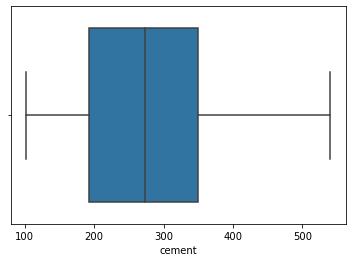

In [19]:
#Distribution of CEMENT

sns.boxplot(x='cement',data=cement, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

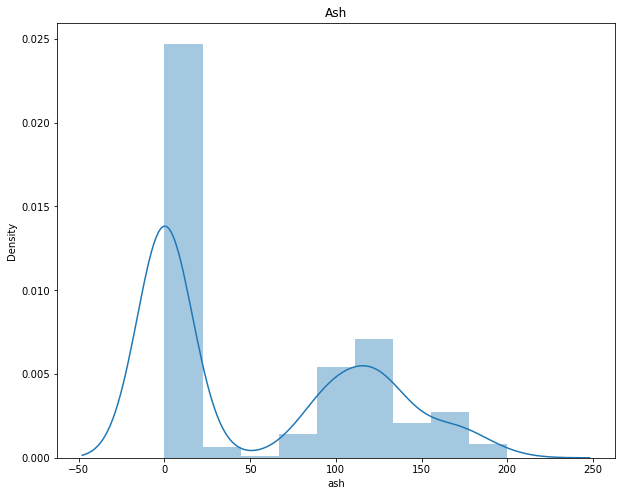

In [21]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(cement['ash']).set_title('Ash')
plt.show()

In [22]:
#Quartiles

w_Q1=cement['Water'].quantile(q=0.25)
w_Q3=cement['Water'].quantile(q=0.75)

print('1st Quartile (Q1) is: ', w_Q1)
print('3rd Quartile (Q3) is: ', w_Q3)
print('Interquartile range (IQR) is: ', stats.iqr(cement['Water']))

1st Quartile (Q1) is:  164.9
3rd Quartile (Q3) is:  192.0
Interquartile range (IQR) is:  27.099999999999994


In [23]:
#Outlier detection from Interquartile range (IQR) in original data

WL_outliers=w_Q1-1.5*(w_Q3-w_Q1)
WU_outliers=w_Q3+1.5*(w_Q3-w_Q1)

print('Lower outlier in water: ',WL_outliers)
print('Upper outlier in water: ',WU_outliers)

Lower outlier in water:  124.25000000000001
Upper outlier in water:  232.64999999999998


In [24]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in water upper: ', cement[cement['Water']>232.64999999999998]['Water'].count())
print('Number of outliers in water lower: ', cement[cement['Water']<124.25000000000001]['Water'].count())

# print('% of Outlier in water upper: ', round(df[df['Water']>232.64999999999998]['Water'].count()*100/len(df)))
# print('% of Outlier in water lower: ', round(df[df['Water']<124.25000000000001]['Water'].count()*100/len(df)))

Number of outliers in water upper:  4
Number of outliers in water lower:  5


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Water'>

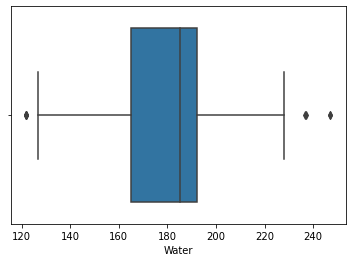

In [25]:
#Distribution of WATER

sns.boxplot(x='Water', data=cement, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

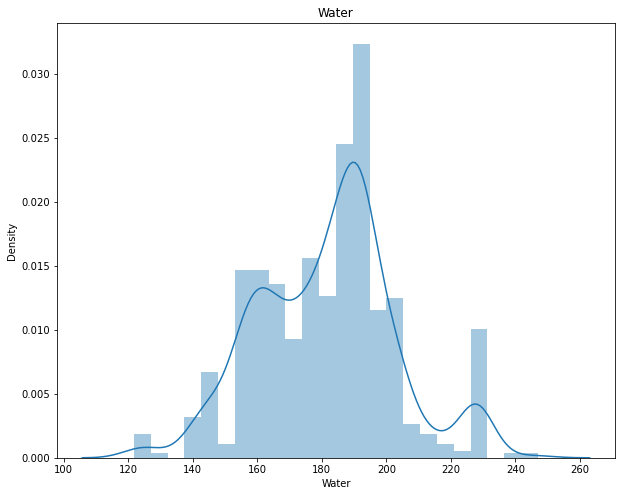

In [26]:
plt.figure(figsize=(10,8))
sns.distplot(cement['Water']).set_title('Water')
plt.show()

In [27]:
Q1=cement['slag'].quantile(q=0.25)
Q3=cement['slag'].quantile(q=0.75)

In [28]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in water: ',L_outliers)
print('Upper outlier in water: ',U_outliers)

Lower outlier in water:  -214.42499999999998
Upper outlier in water:  357.375


In [29]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in slag upper: ', cement[cement['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower: ', cement[cement['slag']<-214.425]['slag'].count())

# print('% of Outlier in slag upper: ', round(df[df['slag']>357.375]['slag'].count()*100/len(df)))
# print('% of Outlier in slag lower: ', round(df[df['slag']<-214.425]['slag'].count()*100/len(df)))

Number of outliers in slag upper:  2
Number of outliers in slag lower:  0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='slag'>

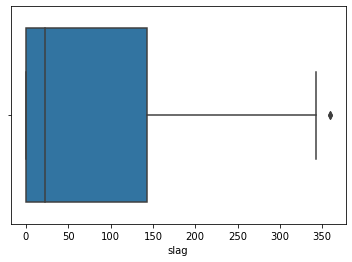

In [30]:
#Distribution of SLAG

sns.boxplot(x='slag', data=cement, orient='h')

In [31]:
Q1=cement['age'].quantile(q=0.25)
Q3=cement['age'].quantile(q=0.75)

In [32]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in age: ',L_outliers)
print('Upper outlier in age: ',U_outliers)

Lower outlier in age:  -66.5
Upper outlier in age:  129.5


In [33]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in age upper: ', cement[cement['age']>129.5]['age'].count())
print('Number of outliers in age lower: ', cement[cement['age']<-66.5]['age'].count())

Number of outliers in age upper:  59
Number of outliers in age lower:  0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='age'>

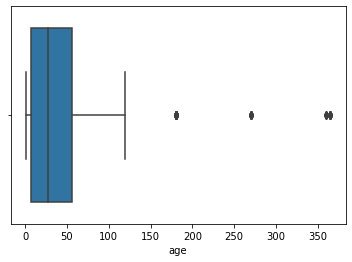

In [34]:
#Distribution of AGE

sns.boxplot(x='age', data=cement, orient='h')

In [35]:
Q1=cement['ash'].quantile(q=0.25)
Q3=cement['ash'].quantile(q=0.75)

In [36]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in ash: ',L_outliers)
print('Upper outlier in ash: ',U_outliers)

Lower outlier in ash:  -177.405
Upper outlier in ash:  295.675


In [37]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in ash upper: ', cement[cement['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower: ', cement[cement['ash']<-177.45]['ash'].count())

Number of outliers in ash upper:  0
Number of outliers in ash lower:  0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='ash'>

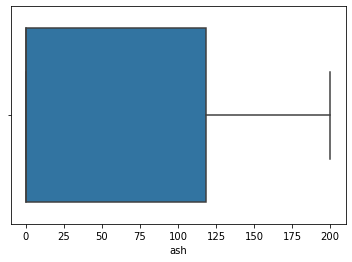

In [38]:
#Distribution of AGE

sns.boxplot(x='ash', data=cement, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='strength', ylabel='Density'>

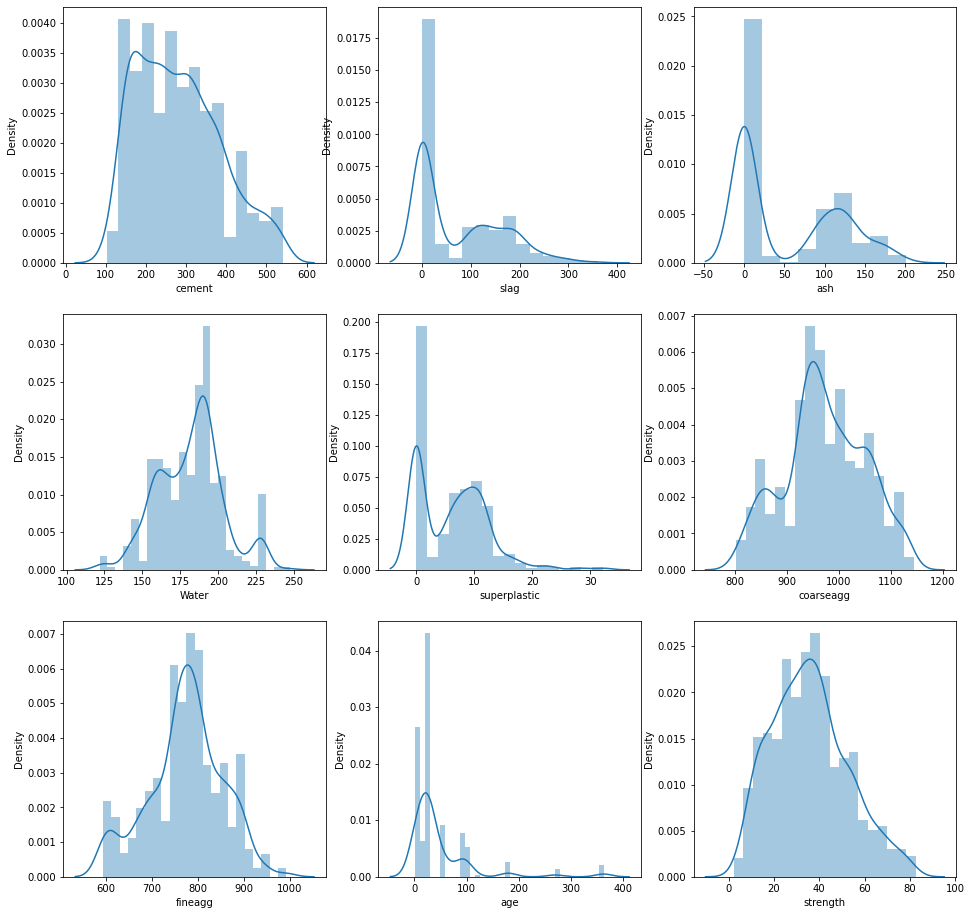

In [40]:
#Displot

fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(cement['cement'],ax=ax2[0][0])
sns.distplot(cement['slag'],ax=ax2[0][1])
sns.distplot(cement['ash'],ax=ax2[0][2])
sns.distplot(cement['Water'],ax=ax2[1][0])
sns.distplot(cement['superplastic'],ax=ax2[1][1])
sns.distplot(cement['coarseagg'],ax=ax2[1][2])
sns.distplot(cement['fineagg'],ax=ax2[2][0])
sns.distplot(cement['age'],ax=ax2[2][1])
sns.distplot(cement['strength'],ax=ax2[2][2])

<IPython.core.display.Javascript object>

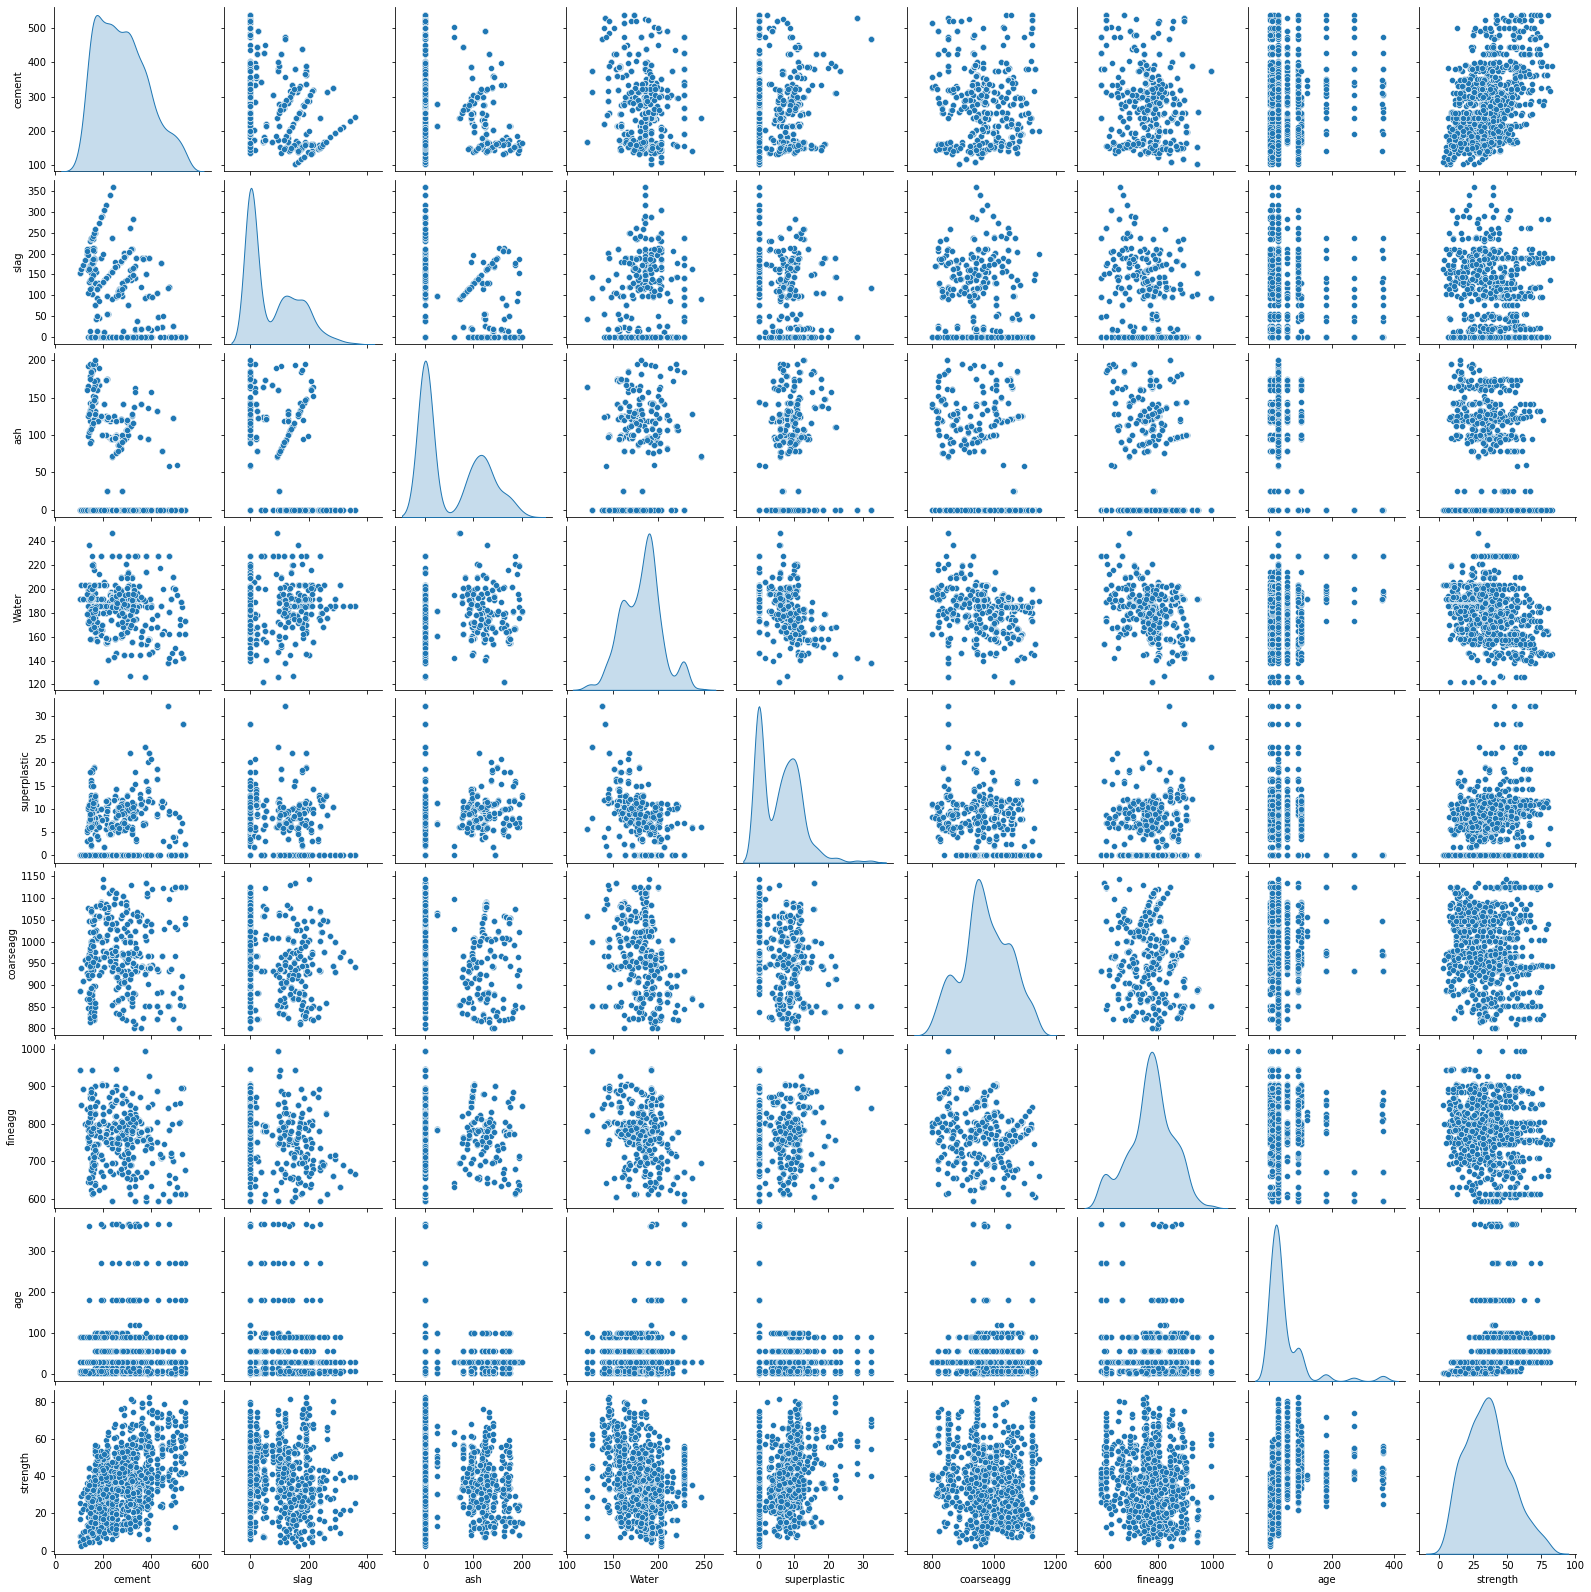

In [41]:
# pairplot.
#plot density curve instead of histogram in the diagonals

sns.pairplot(cement, diag_kind='kde')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

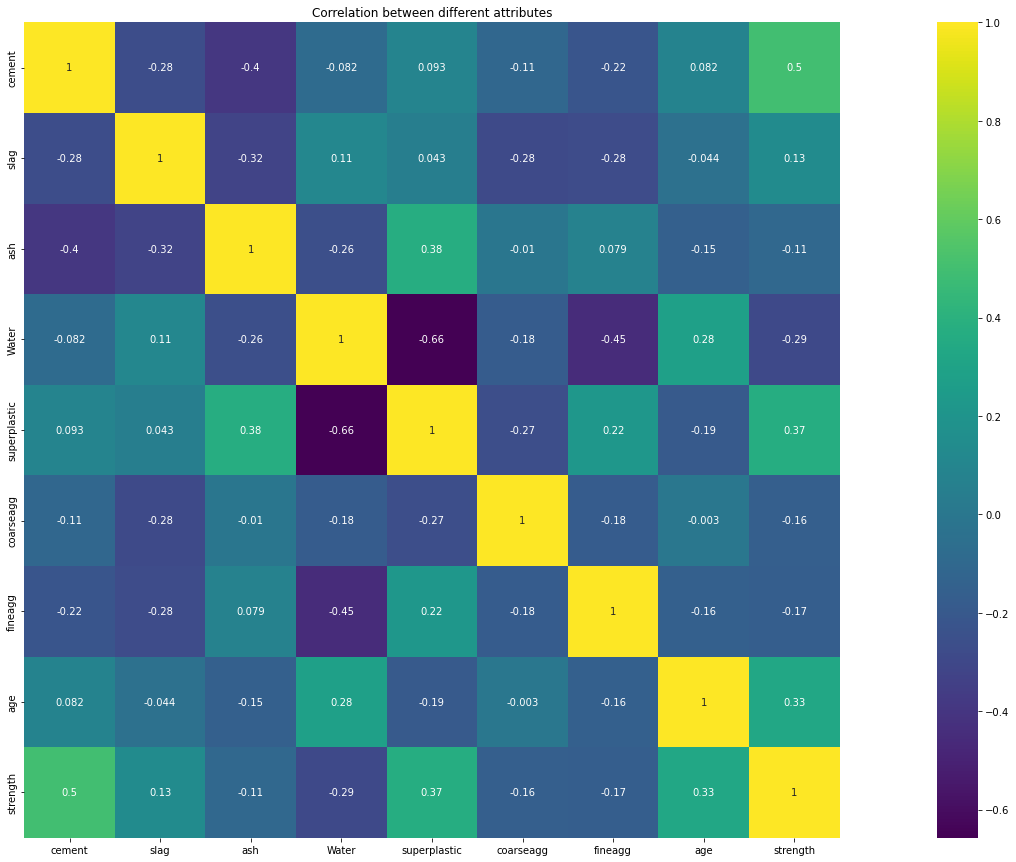

In [43]:
plt.figure(figsize=(35,15))

sns.heatmap(cement.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

<AxesSubplot:>

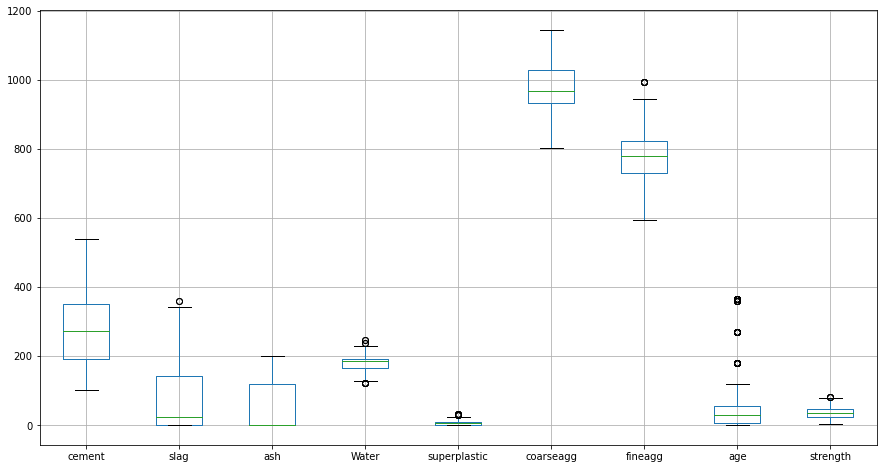

In [45]:
cement.boxplot(figsize=(15,8))

In [46]:
print('Outliers in cement: ', cement[((cement.cement - cement.cement.mean())/cement.cement.std()).abs()>3]['cement'].count())
print('Outliers in slag: ', cement[((cement.slag - cement.slag.mean())/cement.slag.std()).abs()>3]['slag'].count())
print('Outliers in ash: ', cement[((cement.ash - cement.ash.mean())/cement.ash.std()).abs()>3]['ash'].count())
print('Outliers in water: ', cement[((cement.Water - cement.Water.mean())/cement.Water.std()).abs()>3]['Water'].count())
print('Outliers in superplastic: ', cement[((cement.superplastic - cement.superplastic.mean())/cement.superplastic.std()).abs()>3]['superplastic'].count())
print('Outliers in coarseagg: ', cement[((cement.coarseagg - cement.coarseagg.mean())/cement.coarseagg.std()).abs()>3]['coarseagg'].count())
print('Outliers in fineagg: ', cement[((cement.fineagg - cement.fineagg.mean())/cement.fineagg.std()).abs()>3]['fineagg'].count())
print('Outliers in age: ', cement[((cement.age - cement.age.mean())/cement.age.std()).abs()>3]['age'].count())

Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  2
Outliers in superplastic:  10
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  33


In [48]:
for cols in cement.columns[:-1]:
  Q1 = cement[cols].quantile(0.25)
  Q3 = cement[cols].quantile(0.75)
  iqr = Q3 - Q1

  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  cement.loc[(cement[cols] < low) | (cement[cols] > high), cols] = cement[cols].median()

<AxesSubplot:>

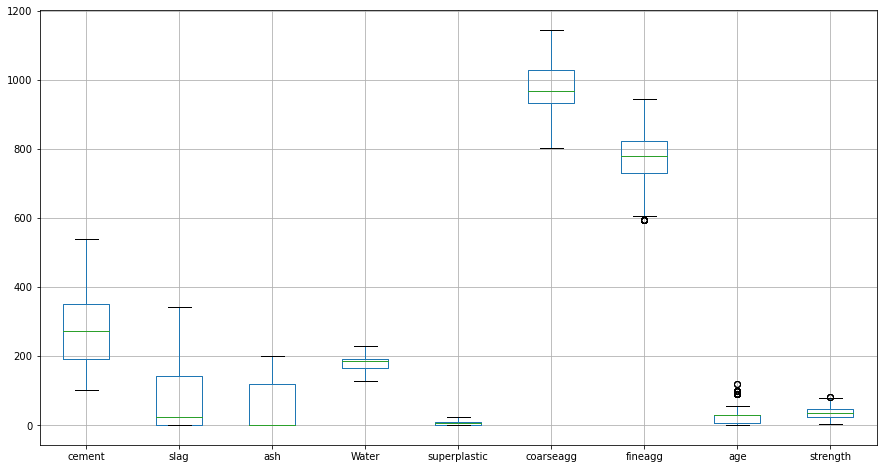

In [49]:
cement.boxplot(figsize=(15,8))

In [50]:
cement.head()

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.296075


In [51]:
#Splitting the data into independent and dependent attributes


#independent and dependent variables
X = cement.drop('strength', axis = 1)
y = cement['strength']

In [53]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_cement = pd.DataFrame(Xscaled, columns=cement.columns)

<IPython.core.display.Javascript object>

In [54]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size= 0.3, random_state= 1)

<IPython.core.display.Javascript object>

In [56]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [57]:
y_pred = model.predict(X_test)

In [58]:
#Model Performance on Training Data

model.score(X_train, y_train)

# round(model.score(X_train, y_train)*100) #if you want to get the exact percentage, uncomment this one

0.9825471643244398

In [59]:
#Model Performance on Test Data

model.score(X_test, y_test)

# round(model.score(X_test, y_test)*100) #if you want to get the exact percentage, uncomment this one

0.8835107521404262

In [60]:
#Same as above
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

<IPython.core.display.Javascript object>

0.8835107521404262

In [61]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

30.532700890737694

In [63]:
#Store the accuracy results for each model in a dataframe for final comparison

results_1 = pd.DataFrame({'Algorithm': ['Random Forest'], 'accuracy': acc_R},index={'1'})
results = results_1[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883511


In [66]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor()

In [67]:
y_pred = model.predict(X_test)

In [68]:
#Model Performance on Training Data

model.score(X_train, y_train)

0.9479484642539228

In [69]:
#Model Performance on Test Data

model.score(X_test, y_test)

0.8824611133365141

In [70]:
#Same as above, you can also store the above in a variable and use without doing the following.
acc_G=metrics.r2_score(y_test, y_pred)
acc_G

<IPython.core.display.Javascript object>

0.8824611133365141

In [71]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

30.807819051701294

In [72]:
#Store the accuracy results for each model in a dataframe for final comparison

gradient_re = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor'], 'accuracy': acc_G},index={'3'})
results = pd.concat([results, gradient_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883511
3,Gradient Boost Regressor,0.882461


In [75]:
from sklearn.ensemble import AdaBoostRegressor

In [76]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [77]:
y_pred = model.predict(X_test)

In [78]:
#Model Performance on Test Data, NB: check on train data

model.score(X_test, y_test)

0.7670094958920508

In [79]:
#Same as above, you can also store the above in a variable and use without doing the following.
acc_Ada=metrics.r2_score(y_test, y_pred)
acc_Ada

<IPython.core.display.Javascript object>

0.7670094958920508

In [80]:
#Store the accuracy results for each model in a dataframe for final comparison

acc_Ada = pd.DataFrame({'Algorithm': ['Ada Boost Regressor'], 'accuracy': acc_Ada},index={'5'})
results = pd.concat([results, acc_Ada])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883511
3,Gradient Boost Regressor,0.882461
5,Ada Boost Regressor,0.767009


In [81]:
#Checking for different values of neighbors to determine K
from sklearn.neighbors import KNeighborsRegressor


diff_k=[]
for i in range(1,45):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  diff_k.append(np.mean(pred_i != y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean errors')

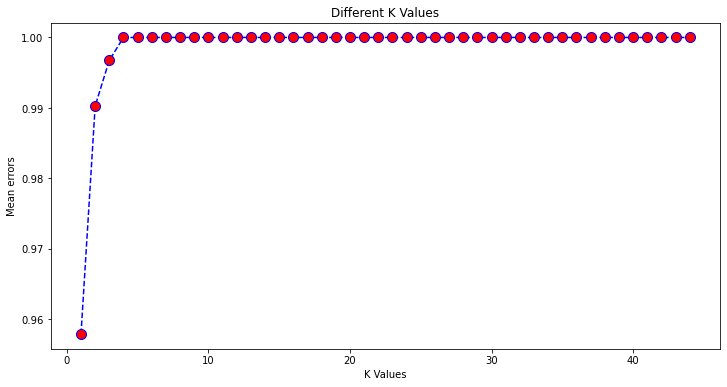

In [82]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

In [83]:
#k=3 is a better choice from the above plot

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [84]:
y_pred = model.predict(X_test)

In [85]:
model.score(X_train, y_train)

0.9077349021214359

In [86]:
acc_KNN=metrics.r2_score(y_test, y_pred)
acc_KNN

<IPython.core.display.Javascript object>

0.7531876239977422

In [87]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

64.69136500643893

In [88]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [acc_KNN]}, index={'7'})
results = pd.concat([results, KNN_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883511
3,Gradient Boost Regressor,0.882461
5,Ada Boost Regressor,0.767009
7,KNN Regressor,0.753188


In [89]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor()
model.fit(X_train,y_train)

BaggingRegressor()

In [90]:
y_pred = model.predict(X_test)

In [91]:
model.score(X_train, y_train)

0.9766779415929803

In [92]:
model.score(X_test, y_test)

0.8542367524580345

In [93]:
acc_BR=metrics.r2_score(y_test, y_pred)
acc_BR

<IPython.core.display.Javascript object>

0.8542367524580345

In [94]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

38.20563459579084

In [95]:
#Store the accuracy results for each model in a dataframe for final comparison

Bagging_df = pd.DataFrame({'Algorithm': ['Bagging Regressor'], 'accuracy': acc_BR},index={'9'})
results = pd.concat([results, Bagging_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883511
3,Gradient Boost Regressor,0.882461
5,Ada Boost Regressor,0.767009
7,KNN Regressor,0.753188
9,Bagging Regressor,0.854237


In [98]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [99]:
y_pred = model.predict(X_test)

In [100]:
model.score(X_train, y_train)

0.7296534161303989

In [101]:
acc_SVR=metrics.r2_score(y_test, y_pred)
acc_SVR

<IPython.core.display.Javascript object>

0.6550336531743011

In [102]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

90.41825300217097

In [103]:
#Store the accuracy results for each model in a dataframe for final comparison

SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'accuracy': acc_SVR},index={'11'})
results = pd.concat([results, SVR_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883511
3,Gradient Boost Regressor,0.882461
5,Ada Boost Regressor,0.767009
7,KNN Regressor,0.753188
9,Bagging Regressor,0.854237
11,Support Vector Regressor,0.655034


In [104]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor()

xgr.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [105]:
from sklearn.tree import DecisionTreeRegressor

dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [106]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
               Importance
cement          0.307916
slag            0.058137
ash             0.009107
Water           0.125134
superplastic    0.051853
coarseagg       0.025540
fineagg         0.049570
age             0.372743


In [107]:
y_pred = dec_model.predict(X_test)

In [108]:
dec_model.score(X_train, y_train)

0.9938748100768497

In [109]:
dec_model.score(X_test, y_test)

0.7461403810095909

In [110]:
acc_DT=metrics.r2_score(y_test, y_pred)
acc_DT

<IPython.core.display.Javascript object>

0.7461403810095909

In [111]:
#Store the accuracy results for each model in a dataframe for final comparison

DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 1'], 'accuracy': [acc_DT]},index={'14'})
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883511
3,Gradient Boost Regressor,0.882461
5,Ada Boost Regressor,0.767009
7,KNN Regressor,0.753188
9,Bagging Regressor,0.854237
11,Support Vector Regressor,0.655034
14,Decision Tree Regressor 1,0.746140


In [113]:
cement2 = cement.copy() #create a copy of df in order to drop the least important features and work on only the important features

In [114]:
X = cement2.drop(['strength','ash','coarseagg','fineagg'],axis=1)
y = cement2['strength']
#Split the X and y into training and test set in 70:30 ratio
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state = 1)

<IPython.core.display.Javascript object>

In [115]:
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

In [116]:
decNew_Model = DecisionTreeRegressor()
decNew_Model.fit(X_train, y_train)

DecisionTreeRegressor()

In [117]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(decNew_Model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
               Importance
cement          0.351250
slag            0.071364
Water           0.140438
superplastic    0.060021
age             0.376925


In [118]:
y_pred = decNew_Model.predict(X_test)

In [119]:
decNew_Model.score(X_train, y_train)

0.9919795459520595

In [120]:
decNew_Model.score(X_test, y_test)

0.7667378681771737

In [121]:
acc_DT=metrics.r2_score(y_test, y_pred)
acc_DT

<IPython.core.display.Javascript object>

0.7667378681771737

In [122]:
#Store the accuracy results for each model in a dataframe for final comparison

DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 2'], 'accuracy': [acc_DT]},index={'16'})
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883511
3,Gradient Boost Regressor,0.882461
5,Ada Boost Regressor,0.767009
7,KNN Regressor,0.753188
9,Bagging Regressor,0.854237
11,Support Vector Regressor,0.655034
14,Decision Tree Regressor 1,0.746140
16,Decision Tree Regressor 2,0.766738


In [124]:
#Let's create our training and testing data again since it has been overriden

X=cement.drop('strength',axis=1)
y=cement['strength']

In [126]:
Xscaled=X.apply(zscore)
Xscaled_cement=pd.DataFrame(Xscaled,columns=cement.columns)

<IPython.core.display.Javascript object>

In [127]:
#Split the X and y into training and test set in 70:30 ratio
X_train,X_test, y_train,y_test = train_test_split(Xscaled,y, test_size=0.3,random_state = 1)

<IPython.core.display.Javascript object>

In [128]:
dec_prun_model=DecisionTreeRegressor(max_depth=4, random_state=1,min_samples_leaf=5)
dec_prun_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [129]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_prun_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
               Importance
cement          0.355311
slag            0.000000
ash             0.000000
Water           0.105940
superplastic    0.036227
coarseagg       0.000000
fineagg         0.025032
age             0.477490


In [130]:
!pip install graphviz

In [131]:
!pip install pydot

In [132]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import graphviz
import pydot

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [133]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=4eb9f80503d4b2d338da848217f40db9b465f1d124e1312e463fba842a7b0f27
  Stored in directory: c:\users\rusha\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [138]:
from sklearn.tree import export_graphviz

from IPython.display import Image
import graphviz
import pydot

In [141]:
Xscaled_df=Xscaled_cement.drop('strength',axis=1)
feature_cols = Xscaled_cement.columns

In [145]:
feature_cols 

Index(['cement', 'slag', 'ash', 'Water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')